In [1]:
import itertools
import json
import os
from random import sample

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn import metrics

from database import data_utils

import importlib
importlib.reload(data_utils)

RUN_FOLDER = "../results/3_mo_cross_val/"

In [2]:
# # Read in DeepTTE files
# # Predictions and labels
# kcm_deeptte_preds = pd.read_csv(RUN_FOLDER+"kcm/deeptte_results/deeptte.res", delimiter=" ", header=None, names=["label","pred"])
# atb_deeptte_preds = pd.read_csv(RUN_FOLDER+"atb/deeptte_results/deeptte.res", delimiter=" ", header=None, names=["label","pred"])

In [3]:
kcm_model_results = data_utils.load_pkl(RUN_FOLDER + "kcm/" + "model_results.pkl")
atb_model_results = data_utils.load_pkl(RUN_FOLDER + "atb/" + "model_results.pkl")

In [4]:
kcm_result_df = data_utils.extract_results("Seattle", kcm_model_results)
atb_result_df = data_utils.extract_results("Trondheim", atb_model_results)
model_performances_df = pd.concat([kcm_result_df, atb_result_df], axis=0)
model_performances_df.head()

,Model,City,Fold,MAPE,RMSE,MAE
0,AVG,Seattle,0,0.27,750.39,541.11
1,SCH,Seattle,0,0.17,2230.27,303.82
2,FF,Seattle,0,0.14,375.64,259.99
3,AVG,Seattle,1,0.27,750.56,541.19
4,SCH,Seattle,1,0.17,2230.27,303.82


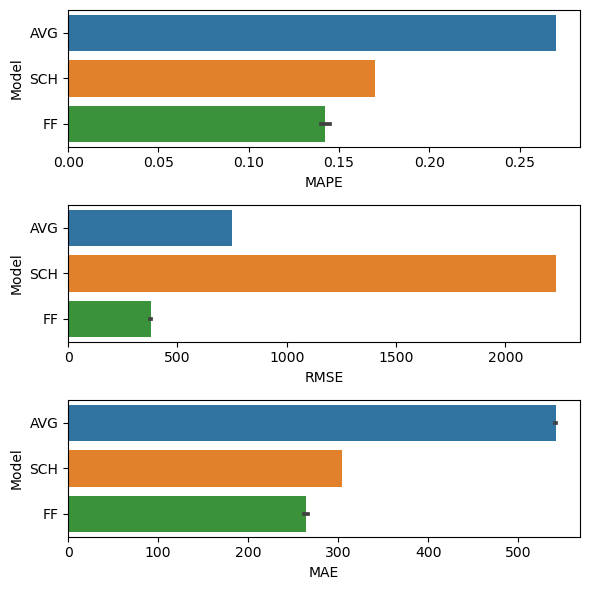

In [5]:
plot_data = model_performances_df[model_performances_df['City']=="Seattle"]

fig, axes = plt.subplots(3,1)
fig.set_figheight(6)
fig.set_figwidth(6)
sns.barplot(plot_data, x="MAPE", y="Model", ax=axes[0])
sns.barplot(plot_data, x="RMSE", y="Model", ax=axes[1])
sns.barplot(plot_data, x="MAE", y="Model", ax=axes[2])
fig.tight_layout()
plt.savefig("../plots/model_performances_seattle.png", dpi=1800, bbox_inches='tight')

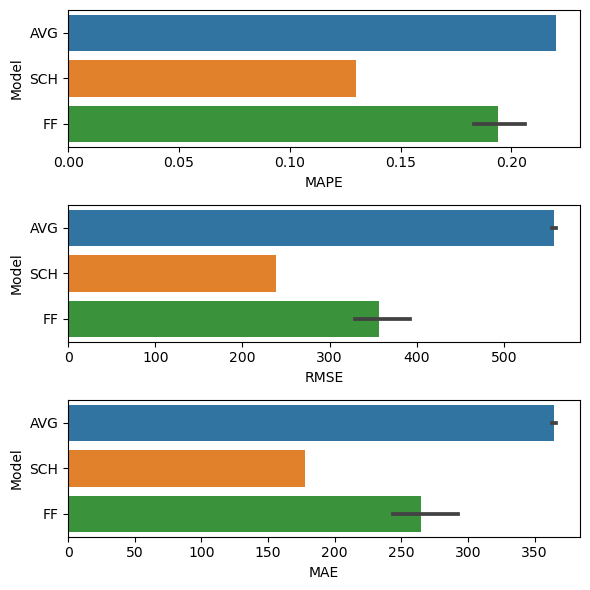

In [6]:
plot_data = model_performances_df[model_performances_df['City']=="Trondheim"]

fig, axes = plt.subplots(3,1)
fig.set_figheight(6)
fig.set_figwidth(6)
sns.barplot(plot_data, x="MAPE", y="Model", ax=axes[0])
sns.barplot(plot_data, x="RMSE", y="Model", ax=axes[1])
sns.barplot(plot_data, x="MAE", y="Model", ax=axes[2])
fig.tight_layout()
plt.savefig("../plots/model_performances_trondheim.png", dpi=1800, bbox_inches='tight')